<a href="https://colab.research.google.com/github/Herodegon/ECGR4105-Intro-to-Machine-Learning/blob/main/Assignment5_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 (30 pts):

In our temperature prediction example discussed in class, let’s change our model to a nonlinear system. Consider the following description for our model:



`w2 * t_u ** 2 + w1 * t_u + b`



1.a Modify the training loop properly to accommodate this redefinition.



1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.



1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch

# Temperature Dataset
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [193]:
# This will be the model for our dataset
def Model(t_u,w1,w2,b):
  return w2 * t_u ** 2 + w1 * t_u + b

# Function to calculate the loss
# Loss is calculated as mean squared
def Loss(t_p,t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [194]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
t_p = Model(t_u,*params)
loss = Loss(t_p, t_c)
loss.backward()
params.grad

tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])

In [195]:
from torch.optim import Adam

# Training loop completed with PyTorch
# This loop is making heavy use of code provided in
# Lecture 12 of Vinit's Intro to Machine Learning course
def Training_Loop(n_epochs, optimizer, learning_rate, params, t_u, t_c):
  loss_history = np.zeros(n_epochs)
  for epoch in range(1, n_epochs + 1):
    t_p = Model(t_u, *params)
    loss = Loss(t_p, t_c)
    loss_history[epoch-1] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params, loss_history

def PlotLoss(training_cost_history,iterations,x_label,y_label,title):
  plt.plot(range(iterations),training_cost_history, color='b', label= 'Loss')
  plt.rcParams["figure.figsize"] = (6,4)
  plt.legend()

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

  # Print final graph
  plt.show()
  return

In [196]:
n_epochs = 5000
learning_rate = [0.0001,0.001,0.01,0.1]
for rate in learning_rate:
  params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
  optimizer = Adam([params], lr=rate)
  t_u = t_u
  t_c = t_c
  print("Learning Rate: ", rate)
  Training_Loop(n_epochs, optimizer, learning_rate, params, t_u, t_c)
  print("\n")

Learning Rate:  0.0001
Epoch 500, Loss 10577728.000000
Epoch 1000, Loss 9524402.000000
Epoch 1500, Loss 8545122.000000
Epoch 2000, Loss 7634292.500000
Epoch 2500, Loss 6787368.000000
Epoch 3000, Loss 6000706.000000
Epoch 3500, Loss 5271407.500000
Epoch 4000, Loss 4597170.000000
Epoch 4500, Loss 3976134.250000
Epoch 5000, Loss 3406753.750000


Learning Rate:  0.001
Epoch 500, Loss 3668163.000000
Epoch 1000, Loss 768786.437500
Epoch 1500, Loss 90021.125000
Epoch 2000, Loss 4791.339844
Epoch 2500, Loss 98.014191
Epoch 3000, Loss 6.609710
Epoch 3500, Loss 6.117270
Epoch 4000, Loss 6.096753
Epoch 4500, Loss 6.071090
Epoch 5000, Loss 6.038404


Learning Rate:  0.01
Epoch 500, Loss 6.108693
Epoch 1000, Loss 5.984358
Epoch 1500, Loss 5.809032
Epoch 2000, Loss 5.586317
Epoch 2500, Loss 5.320902
Epoch 3000, Loss 5.021267
Epoch 3500, Loss 4.701309
Epoch 4000, Loss 4.380754
Epoch 4500, Loss 4.083409
Epoch 5000, Loss 3.832656


Learning Rate:  0.1
Epoch 500, Loss 4.844501
Epoch 1000, Loss 3.785644


[-4.   0.5  3.   6.   8.  11.  13.  14.  15.  21.  28. ]


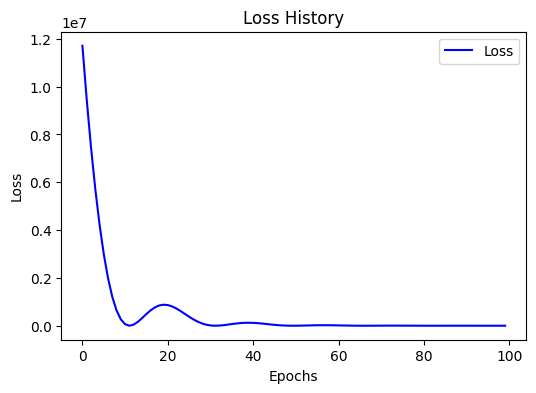

In [197]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Temperature Dataset
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

n_epochs = 100
learning_rate = 0.1
loss_history_1 = np.zeros(n_epochs)
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
optimizer = Adam([params], lr=learning_rate)
params, loss_history_1 = Training_Loop(n_epochs, optimizer, learning_rate, params, t_u, t_c)

# Model
model_2 = GaussianNB()

# Training
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = np.array(t_c).reshape(-1,1)
t_u = np.array(t_u).reshape(-1,1)

print(np.unique(t_c))

#loss_history_2 = np.zeros(n_epochs)
#for i in range(0,n_epochs):
#  model_2.partial_fit(t_u,t_c,np.unique(t_c))
#  t_c_pred = model_2.predict(t_u)
#  loss_history_2[i] = mean_squared_error(t_c,t_c_pred)

PlotLoss(loss_history_1,n_epochs,"Epochs","Loss","Loss History")
#PlotLoss(loss_history_2,n_epochs,"Epochs","Loss","Loss History")

Problem 2 (40 pts):

2.a Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:



area, bedrooms, bathrooms, stories, parking



For this, you need to use the housing dataset. For training and validation use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model, based on the above input variables. In this case, you will have six parameters:



2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per training. Pick the best linear model.



2.c Compare your results against the linear regression done in assignment 1. Do you see meaningful differences?

In [198]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
file_path = '/content/drive/MyDrive/ECGR4105/HW2_Housing.csv'
dataset1 = pd.DataFrame(pd.read_csv(file_path))
M=len(dataset1)
M

545

In [200]:
X_1 = dataset1.iloc[:,[1,2,3,4,10]].values  # Get input values from each explanatory variable (Area, Bedrooms, Bathrooms, Stories, Parking)
Y_1 = dataset1.iloc[:,0].values             # Get output values (Price of Housing)
m = int(np.floor(len(X_1)*0.8))            # Number of training examples
n = int(np.floor(len(X_1)*0.2))            # Number of validation examples

print("X_area = ", np.hstack(X_1[:5,0]))
print("X_bedrooms = ", np.hstack(X_1[:5,1]))
print("X_bathrooms = ", np.hstack(X_1[:5,2]))
print("X_stories = ", np.hstack(X_1[:5,3]))
print("X_parking = ", np.hstack(X_1[:5,4]))
print("Y = ", np.hstack(Y_1[:5]))
print("m = ", m)
print("n = ", n)

X_area =  [7420 8960 9960 7500 7420]
X_bedrooms =  [4 4 3 4 4]
X_bathrooms =  [2 4 2 2 1]
X_stories =  [3 4 2 2 2]
X_parking =  [2 3 2 3 2]
Y =  [13300000 12250000 12250000 12215000 11410000]
m =  436
n =  109


In [201]:
def Model2(t_u,w,b):
  return w * t_u + b

def Training_Loop_2(n_epochs, optimizer, learning_rate, params, t_u_train, t_c_train, t_u_test, t_c_test):
  train_loss_history = np.zeros(n_epochs)
  valid_loss_history = np.zeros(n_epochs)
  for epoch in range(1, n_epochs + 1):
    t_p_train = Model2(t_u_train, *params)
    t_p_valid = Model2(t_u_test, *params)

    train_loss = Loss(t_p_train, t_c_train)
    valid_loss = Loss(t_p_valid, t_c_test)

    train_loss_history[epoch-1] = train_loss
    valid_loss_history[epoch-1] = valid_loss

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f"Epoch {epoch}, Training Loss {float(train_loss)}, Validation Loss {float(valid_loss)}")

  return params, train_loss_history, valid_loss_history

In [202]:
n_samples = X_1.shape[0]
n_val = int(0.2 * n_samples)

train_indices = torch.tensor(X_1[:-m])
val_indices = torch.tensor(X_1[-m:])

t_u_train = X_1[train_indices]
t_u_valid = X_1[val_indices]

t_c_train = Y_1[train_indices]
t_c_valid = Y_1[val_indices]

IndexError: index 7420 is out of bounds for axis 0 with size 545

In [ ]:
n_epochs = 5000
learning_rate = [0.0001,0.001,0.01,0.1]
for rate in learning_rate:
  params = torch.tensor([1.0,0.0], requires_grad=True)
  optimizer = Adam([params], lr=rate)
  t_u_train = t_u_train
  t_c_train = t_c_train
  t_u_test = t_u_valid
  t_c_test = t_c_valid
  print("Learning Rate: ", rate)
  Training_Loop_2(n_epochs, optimizer, learning_rate, params, t_u_train, t_c_train, t_u_test, t_c_test)
  print("\n")